Suppose we have $N$ stocks, for which, the log-returns at time $t$ is denoted by $x_t∈R^N$. 
<br>Consider the following linear factor model $\large x_t=α+βf_t+ϵ_t,  t=1,2,...,T$
<br>where $f_t∈R^2$ denotes the values of the factors at time t, and $α∈R^N$ and $β∈R^{N×2}$ are constant parameters.

In this excercise, we use the log-returns of 10 popular stocks as $x_t$ starting from 2019-01-01 to 2022-12-31. We also use the S&P500 index and the Bitcoin price within the same period, for the factors $f_t$.

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

stocks = ['TSLA', 'AMZN', 'EBAY', 'AAPL', 'MSFT', 'META', 'GOOGL',
          'NFLX', 'IBM', 'NVDA']
          
indices = ['^GSPC', 'BTC-USD']

prices = pdr.get_data_yahoo(stocks, start="2019-01-01", end="2022-12-31")[['Adj Close']]
factor = pdr.get_data_yahoo(indices, start="2019-01-01", end="2022-12-31")[['Adj Close']]

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  2 of 2 completed
                BTC-USD        ^GSPC
Date                                
2019-01-01  3843.520020          NaN
2019-01-02  3943.409424  2510.030029
2019-01-03  3836.741211  2447.889893
2019-01-04  3857.717529  2531.939941
2019-01-05  3845.194580          NaN


## Question 1

In [5]:
import pandas as pd
asg = pd.concat([prices,factor],axis=1)
asg = asg.interpolate(method ='linear', limit_direction ='backward')
prices = asg.iloc[:,:-2]
factor = asg.iloc[:,-2:]
display(prices, factor)

Adj Close                                               \
                  AAPL       AMZN       EBAY      GOOGL         IBM   
Date                                                                  
2019-01-01   38.047039  76.956497  27.043743  52.734001   89.489311   
2019-01-02   38.047039  76.956497  27.043743  52.734001   89.489311   
2019-01-03   34.257282  75.014000  26.546928  51.273499   87.702797   
2019-01-04   35.719704  78.769501  27.156237  53.903500   91.128250   
2019-01-05   35.693199  79.671501  27.312468  53.867667   91.343150   
...                ...        ...        ...        ...         ...   
2022-12-26  130.288574  83.592501  39.875983  87.850000  140.501686   
2022-12-27  129.831772  83.040001  39.853611  87.389999  140.691849   
2022-12-28  125.847855  81.820000  39.694511  86.019997  138.320984   
2022-12-29  129.412415  84.180000  41.583782  88.449997  139.348358   
2022-12-30  129.731918  84.000000  41.235760  88.230003  139.180420   

                                                                        
                  META        MSFT        NFLX        NVDA        TSLA  
Date                                                                    
2019-01-01  135.679993   96.632660  267.660004   33.799732   20.674667  
2019-01-02  135.679993   96.632660  267.660004   33.799732   20.674667  
2019-01-03  131.740005   93.077728  271.200012   31.757648   20.024000  
2019-01-04  137.949997   97.406700  297.570007   33.792286   21.179333  
2019-01-05  137.983332   97.448115  303.493337   34.388612   21.563111  
...                ...         ...         ...         ...         ...  
2022-12-26  117.169998  236.809372  286.867508  143.898060  112.612499  
2022-12-27  116.879997  236.367981  284.170013  141.186020  109.099998  
2022-12-28  115.620003  233.944031  276.880005  140.336166  112.709999  
2022-12-29  120.260002  240.407837  291.119995  146.005203  121.820000  
2022-12-30  120.339996  239.220825  294.880005  146.115189  123.180000  

[1460 rows x 10 columns]

Adj Close             
                 BTC-USD        ^GSPC
Date                                 
2019-01-01   3843.520020  2510.030029
2019-01-02   3943.409424  2510.030029
2019-01-03   3836.741211  2447.889893
2019-01-04   3857.717529  2531.939941
2019-01-05   3845.194580  2537.856608
...                  ...          ...
2022-12-26  16919.804688  3833.142517
2022-12-27  16717.173828  3829.250000
2022-12-28  16552.572266  3783.219971
2022-12-29  16642.341797  3849.280029
2022-12-30  16602.585938  3839.500000

[1460 rows x 2 columns]

(a) Explain about the meaning of $α,β,f_t$, and $ϵ_t$.
<br><br> $\alpha$ is the 10 * 1 intercept for 10 assets
<br> $\beta$ is the 10 * 2 factor loading matrix
<br> $f_t$ is the 2 * 1 vector of 2 common factors, where in this situation is S&P500 and bitcoin
<br> $ϵ_t$ is 10-variate white noise with 0 mean and cov[$ϵ_t$] = $Ψ$
<br>$Ψ$ is an diagonal matrix with its diagonal components being ($σ_1^2,σ_2^2,..., σ_{10}^2$) where $σ_m^2$ is the variance of the $n$-th specific asset

(b) Find $α^∗$ and $β^∗$ by solving the following least-squares problem using an optional solver in python (e.g., CVXPY):

In [6]:
import cvxpy as cp  
import numpy as np

In [7]:
# Log returns
X = prices[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close',axis=1)
f = factor[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close', axis=1)
display(X)
display(f)

,AAPL,AMZN,EBAY,GOOGL,IBM,META,MSFT,NFLX,NVDA,TSLA
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.104924,-0.025566,-0.018542,-0.028086,-0.020165,-0.029469,-0.037482,0.013139,-0.062319,-0.031978
2,0.041803,0.048851,0.022693,0.050021,0.038314,0.046061,0.045460,0.092793,0.062099,0.056094
3,-0.000742,0.011386,0.005737,-0.000665,0.002355,0.000242,0.000425,0.019710,0.017493,0.017958
4,-0.000743,0.011258,0.005704,-0.000665,0.002350,0.000242,0.000425,0.019329,0.017192,0.017641
...,...,...,...,...,...,...,...,...,...,...
1454,-0.003500,-0.006588,-0.000561,-0.005223,0.001354,-0.002472,-0.001862,-0.009359,-0.018672,-0.030714
1455,-0.003512,-0.006631,-0.000561,-0.005250,0.001353,-0.002478,-0.001866,-0.009448,-0.019027,-0.031688
1456,-0.031166,-0.014801,-0.004000,-0.015801,-0.016995,-0.010839,-0.010308,-0.025988,-0.006038,0.032553
1457,0.027931,0.028436,0.046497,0.027858,0.007400,0.039347,0.027255,0.050151,0.039602,0.077726


,BTC-USD,^GSPC
0,0.025657,0.000000
1,-0.027422,-0.025068
2,0.005452,0.033759
3,-0.003251,0.002334
4,0.058447,0.002329
...,...,...
1454,0.004610,-0.001015
1455,-0.012048,-0.001016
1456,-0.009895,-0.012093
1457,0.005409,0.017311


### I tried two methods to solve this problem 1. cvxpy and 2. sklearn LinearRegression

In [26]:
n = 10
k = 2

## Define variables
alpha = cp.Variable((n,1))
beta = cp.Variable((n,k))
ones = np.ones((1459,1)) 

# Define the SSE objective
obj = cp.Minimize(cp.sum_squares(X.T.values - alpha @ ones.T - beta @ f.T.values))

prob = cp.Problem(obj)
prob.solve()

alpha = pd.DataFrame(alpha.value)
beta = pd.DataFrame(beta.value)
display(alpha, beta)

,0
0,0.000488
1,-0.000262
2,0.000039
3,0.000023
4,0.000070
5,-0.000460
6,0.000273
7,-0.000265
8,0.000483
9,0.000765


,0,1
0,-0.001942,1.217669
1,0.016974,1.048538
2,-0.005656,0.877418
3,0.004158,1.116559
4,-0.018406,0.862035
5,0.009130,1.263689
6,0.008681,1.166589
7,0.032682,1.024421
8,0.026976,1.694370
9,0.080919,1.295650


In [10]:
## sklearn method
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(f, X)

alpha = pd.DataFrame(lr.intercept_)
beta = pd.DataFrame(lr.coef_)
alpha.index =  ['TSLA', 'AMZN', 'EBAY', 'AAPL', 'MSFT', 'META', 'GOOGL','NFLX', 'IBM', 'NVDA']
beta.index =  ['TSLA', 'AMZN', 'EBAY', 'AAPL', 'MSFT', 'META', 'GOOGL','NFLX', 'IBM', 'NVDA']

display(alpha, beta)

,0
TSLA,0.000488
AMZN,-0.000262
EBAY,0.000039
AAPL,0.000023
MSFT,0.000070
META,-0.000460
GOOGL,0.000273
NFLX,-0.000265
IBM,0.000483
NVDA,0.000765


,0,1
TSLA,-0.001942,1.217669
AMZN,0.016974,1.048538
EBAY,-0.005656,0.877418
AAPL,0.004158,1.116559
MSFT,-0.018406,0.862035
META,0.009130,1.263689
GOOGL,0.008681,1.166589
NFLX,0.032682,1.024421
IBM,0.026976,1.694370
NVDA,0.080919,1.295650


#### (c) Find X and F, such that the above problem can be restated as follows

$Γ∗=argmin∥X−ΓF∥_{F}^2$
where $Γ=[α,β]∈R^{N×3}$

In this case, X would have to be the transpose of the original X, and F can be formulated by <br>`one = np.ones((len(f),1))` <br>
`f_new = np.append(one, f, axis=1)`
<br> so, the new f is [1,f] and the f in the objective would have to be the transpose of the new f
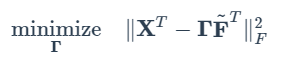

#### (d) Find the optimal values $α∗$ and $β∗$ using the closed-form solution to the problem above (given in the Py-session_iid_modeling slides) and compare with the previous part.

In [11]:
import pandas as pd
F_ = np.column_stack([np.ones(len(f)), f])
Gamma_mat = np.linalg.solve(F_.T @ F_, F_.T @ X)
Gamma = pd.DataFrame(Gamma_mat.T, columns = ["alpha", "beta1", "beta2"])
Gamma.index =  ['TSLA', 'AMZN', 'EBAY', 'AAPL', 'MSFT', 'META', 'GOOGL','NFLX', 'IBM', 'NVDA']
alpha = Gamma[["alpha"]]
beta = Gamma[["beta1", 'beta2']]
display(alpha)
display(beta)

,alpha
TSLA,0.000488
AMZN,-0.000262
EBAY,0.000039
AAPL,0.000023
MSFT,0.000070
META,-0.000460
GOOGL,0.000273
NFLX,-0.000265
IBM,0.000483
NVDA,0.000765


,beta1,beta2
TSLA,-0.001942,1.217669
AMZN,0.016974,1.048538
EBAY,-0.005656,0.877418
AAPL,0.004158,1.116559
MSFT,-0.018406,0.862035
META,0.009130,1.263689
GOOGL,0.008681,1.166589
NFLX,0.032682,1.024421
IBM,0.026976,1.694370
NVDA,0.080919,1.295650


It shows some differences with the cvxpy solution, but has the same solution for the sklearn solution. I assume this is because sklearn solution also solved by problem by solving the linear regression of f and X

#### (e) Draw a 3D scatter plot of points where the x-axis is $β_1$ (first column of $β$), the y-axis is $β_2$ (second column of $β$) and the z-axis is $α$

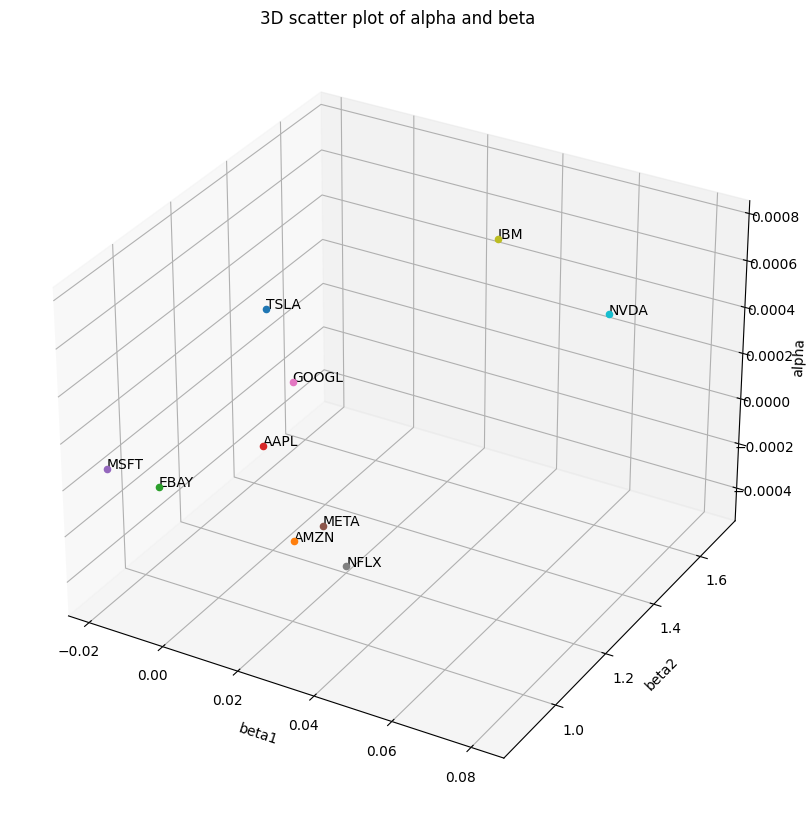

In [12]:
import matplotlib.pyplot as plt

G = Gamma.values

# Creating figure
fig = plt.figure(figsize = (10,15))
ax = plt.axes(projection ="3d")
 
# Creating plot

stock = ['TSLA', 'AMZN', 'EBAY', 'AAPL', 'MSFT', 'META', 'GOOGL',
          'NFLX', 'IBM', 'NVDA']

for i in range(len(G)): #plot each point + it's index as text above
    ax.scatter3D(G[i,1],G[i,2],G[i,0])
    ax.text(G[i,1],G[i,2],G[i,0],  '%s' % (stock[i]), size=10, zorder=1) 

plt.title("3D scatter plot of alpha and beta")

ax.set_xlabel('beta1')
ax.set_ylabel('beta2')
ax.set_zlabel('alpha')
 
# show plot
plt.show()

#### (f) Based on the previous plot and the meaning of $α$ and $β$, which stocks are less risky to invest on and why?

The stocks with higher α and lower βs would be less riskier to invest on. Hence, according to the above figure, stocks like 'TSLA', 'NVDA' and 'AAPL' have high αs while also having small $β_1$s and $β_2$s, and it would probably be less riskier to invest on them.

#### (g) Consider the statistical factor model where the factors $f_t$ are not available. Assume the number of factors K=2. Write a piece of code to estimate the factors ft and the values of α and β. Compare these parameters with those in part (b). Which method do you think works better and why?

In [14]:
from sklearn.preprocessing import scale
T, N = X.shape

K = 2
alpha = np.mean(X, axis=0)
X_ = scale(X, with_std=False)
Sigma_prev = np.zeros((N, N))
Psi = np.zeros((N, N))
Sigma = X_.T @ X_ / (T-1)
while (np.linalg.norm(Sigma - Sigma_prev)/np.linalg.norm(Sigma) > 1e-3):
    values, vectors = np.linalg.eig(Sigma - Psi)
    B = vectors[:, :K] * np.sqrt(values[:K])
    Psi = np.diag(np.diag(Sigma - B @ B.T))
    Sigma_prev = Sigma
    Sigma = B @ B.T + Psi

pd.DataFrame(np.column_stack([alpha, B]).real, index=stocks)

,0,1,2
TSLA,0.000841,4.346964e-10,0.013315
AMZN,0.000060,-3.728883e-11,0.013850
EBAY,0.000289,-2.662203e-11,0.009888
AAPL,0.000353,-3.308371e-11,0.012288
MSFT,0.000303,-1.520444e-11,0.005647
META,-0.000082,-4.408441e-11,0.016374
GOOGL,0.000621,-3.410075e-11,0.012666
NFLX,0.000066,-4.536811e-11,0.016851
IBM,0.001003,-5.756916e-11,0.021383
NVDA,0.001223,-6.065586e-11,0.022529


I think that method from part(b) would work better because we actually have the values of f_t so we do not need to estimate it

## Question 2 - Shrinkage estimator
The Sharpe ratio of a portfolio $w∈R^N$ is defined as the ratio of its expected return to its volatility.
<br>$\LARGE S = \frac{w^⊤\mu}{\sqrt{w^⊤\Sigma w}}$

Consider the log-returns data in Problem 1 for three stocks including ‘AAPL’, ‘MSFT’ and ‘GOOGL’. Divide this data into two parts, one from "2019-01-01" to "2021-12-31", which we call the training data and the other from "2022-01-01" to "2022-12-31", which we refer to as the “test” data. Using the training set, compute the Sharpe ratio for the designed portfolio as a function of $ρ_1$ and $ρ_2$ assuming 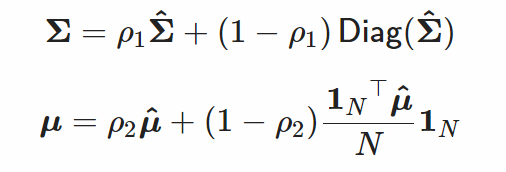

In [15]:
stocks2 = ['AAPL', 'MSFT', 'GOOGL']
train = pdr.get_data_yahoo(stocks2, start="2019-01-01", end="2021-12-31")
test = pdr.get_data_yahoo(stocks2, start="2022-01-01", end="2022-12-31")

train = train[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close',axis=1)
test = test[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close', axis=1)

display(train,test)

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


,AAPL,GOOGL,MSFT
0,-0.104924,-0.028086,-0.037482
1,0.041803,0.050021,0.045460
2,-0.002228,-0.001996,0.001275
3,0.018884,0.008745,0.007225
4,0.016839,-0.003433,0.014198
...,...,...,...
750,0.003637,0.003419,0.004462
751,0.022715,0.006716,0.022921
752,-0.005784,-0.008279,-0.003510
753,0.000502,-0.000218,0.002049


,AAPL,GOOGL,MSFT
0,-0.012773,-0.004091,-0.017296
1,-0.026960,-0.046962,-0.039144
2,-0.016834,-0.000200,-0.007933
3,0.000988,-0.005317,0.000510
4,0.000116,0.011988,0.000732
...,...,...,...
245,-0.002802,0.016612,0.002265
246,-0.013976,-0.020836,-0.007442
247,-0.031166,-0.015801,-0.010308
248,0.027931,0.027858,0.027255


In [16]:
## Shrinkage for mu
T = train.shape[0]
N = 3

sample_mu_train= np.mean(train, axis=0)
sample_sig_train = np.cov(train.T)
t = np.mean(sample_mu_train) * np.ones(N)
lambdas, _ = np.linalg.eig(sample_sig_train)
lmd_mean = np.mean(lambdas)
lmd_max = np.max(lambdas)
rho2 = (1/T)*(N*lmd_mean - 2*lmd_max)/np.linalg.norm(sample_mu_train - t)**2
mu_JS = (1-rho2)*t + rho2*sample_mu_train

## Shrinkage for sigma
T_D = np.diag(np.diag(sample_sig_train)) ## Target matrix
def rho_maxSR(sample_mu_train, sample_sig_train, Sigma_T, T):
    W = np.eye(T) - np.ones(T*T).reshape((T, T))/T
    rho1_sweep = np.exp(np.linspace(-10, 10, 1000))
    obj = []
    for rho1 in rho1_sweep:
        Sigma_sh = rho1 * Sigma_T + sample_sig_train
        D = (1/T)*np.sum(np.diag(sample_sig_train @ np.linalg.solve(Sigma_sh, np.eye(len(Sigma_sh)))))
        delta = D / (1 - D)
        B = np.linalg.solve((np.eye(T)+delta*W) @ (np.eye(T)+delta*W), np.eye(len(W)))
        b = T / np.sum(np.diag(W @ B))
        inv_S_sh_mu = np.linalg.solve(Sigma_sh, sample_mu_train).reshape((1, Sigma_sh.shape[0]))
        num = np.sum(sample_mu_train.values * inv_S_sh_mu) - delta
        den = np.sqrt(b * inv_S_sh_mu @ sample_sig_train @ inv_S_sh_mu.T)
        obj.append(num/den)
    i_max = np.argmax(obj)
    rho1 = rho1_sweep[i_max]
    return (rho1/(1 + rho1))


rho1 = rho_maxSR(sample_mu_train, sample_sig_train, T_D, T)
Sigma_maxSR_D = (1-rho1)*T_D + rho1*sample_sig_train

display(mu_JS,Sigma_maxSR_D)

AAPL     0.000109
GOOGL    0.003115
MSFT     0.001810
dtype: float64

array([[0.00046379, 0.00027164, 0.00032037],
       [0.00027164, 0.00034889, 0.00028222],
       [0.00032037, 0.00028222, 0.00036675]])

In [17]:
import math
def portfolioMaxSharpeRatio(mu, Sigma):
    w = cp.Variable(N)
    obj = cp.Minimize(cp.quad_form(w,Sigma))
    constraint = [cp.sum(w) == 1, w >= 0, w @ mu >= 0.002]
    prob = cp.Problem(obj, constraint)
    prob.solve()
    MaxSharpe_ret = w.value.T @ mu_JS
    MaxSharpe_risk = w.value.T @ Sigma_maxSR_D @ w.value
    print("The max sharpe return is",MaxSharpe_ret)
    print("The max sharpe risk is",MaxSharpe_risk)
    print("The max sharpe ratio is",MaxSharpe_ret/math.sqrt(MaxSharpe_risk))
    
portfolioMaxSharpeRatio(mu_JS, Sigma_maxSR_D)

The max sharpe return is 0.0022474364492615392
The max sharpe risk is 0.0003156610784658631
The max sharpe ratio is 0.12649603186273664


#### b) Use all possible pairs for $ρ_1$ and $ρ_2$ in {0,0.2,0.4,0.6,0.8,1} and plot a heatmap of the Sharpe ratios. Find the pair $(ρ_1,ρ_2)$ that gives the highest Sharpe ratio (on the training data)

In [18]:
import itertools
a = list(itertools.product([0,0.2,0.4,0.6,0.8,1], repeat = 2))
sharpe_list = []

for i in range(len(a)):
    rho_1 = a[i][0]
    rho_2 = a[i][1]
    
    sig = rho_1 * sample_sig_train + (1-rho_1) * T_D
    mu_ = rho_2 * sample_mu_train + (1-rho_2) * t
    
    w = cp.Variable(N)
    obj = cp.Minimize(cp.quad_form(w,sig))
    constraint = [cp.sum(w) == 1, w >= 0, w @ mu_ >= 0.00002]
    prob = cp.Problem(obj, constraint)
    prob.solve()
    
    ret = w.value.T @ mu_
    risk = w.value.T @ sig @ w.value
    sharpe_list.append(ret/math.sqrt(risk))
    
sharpe_list = np.array(sharpe_list).reshape(6,6)
df = pd.DataFrame(sharpe_list, columns = [0,0.2,0.4,0.6,0.8,1],index = [0,0.2,0.4,0.6,0.8,1])
display(df)

,0.0,0.2,0.4,0.6,0.8,1.0
0.0,0.147712,0.147145,0.146578,0.146011,0.145444,0.144876
0.2,0.129697,0.129084,0.128471,0.127857,0.127244,0.126631
0.4,0.117054,0.116359,0.115664,0.114968,0.114273,0.113577
0.6,0.107594,0.106766,0.105937,0.105109,0.104281,0.103453
0.8,0.100237,0.099188,0.098140,0.097091,0.096042,0.094994
1.0,0.094445,0.092985,0.091525,0.090065,0.088605,0.087144


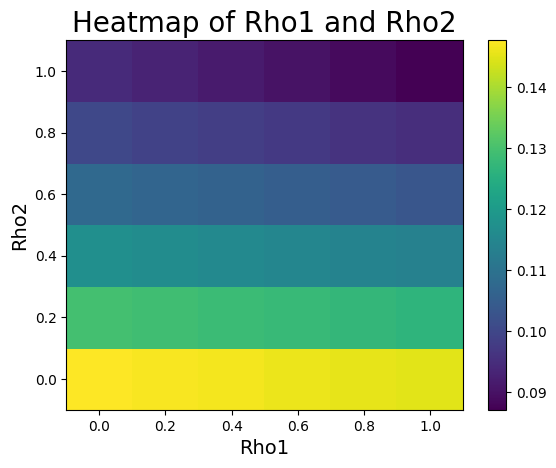

In [19]:
plt.pcolor(df)

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.title('Heatmap of Rho1 and Rho2', fontsize=20)
plt.xlabel('Rho1', fontsize=14)
plt.ylabel('Rho2', fontsize=14)
plt.colorbar()

plt.show()

The highest sharpe ratio was found when rho1 and rho2 were both 0

#### With the pair found in part (b), compute the Sharpe ratio for the designed portfolio on the test data.

In [20]:
sample_mu_test= np.mean(test, axis=0)
sample_sig_test = np.cov(test.T)

weight = np.array([0.28097932,0.36768164,0.35133727]) ## I used the weight from above

sharpe = weight.T @ sample_mu_test / math.sqrt(weight.T @ sample_sig_test @ weight)
print(sharpe)

-0.07166893763374323


#### Compare the value of the test Sharpe ratio to the case where there is no shrinkage estimator used (For $(ρ_1,ρ_2)=(1,1)$)

In [29]:
sig_test = np.diag(np.diag(sample_sig_test))
mu_test = sample_mu_test

sharpe_no_shrinkage = weight.T @ mu_test / math.sqrt(weight.T @ sig_test @ weight)
print(sharpe_no_shrinkage)

-0.11564475328949966
